# Workflow to deduplicate Detections


Make sure the data folder is in the path

## Setup the project

In [1]:
from pathlib import Path
from find_template_and_project_labels import single_stage_template_matching_projection
from image_template_search.util.HastyAnnotationV2 import hA_from_file


base_path = Path("/Users/christian/data/2TB/ai-core/data/detection_deduplication/images_2024_10_07/")
assert base_path.exists(), "The base path does not exist"



annotations_file_path=Path("/Users/christian/data/2TB/ai-core/data/detection_deduplication/all_images_2024_11_10.json")


/Users/christian/PycharmProjects/hnee/image_template_search/LightGlue/lightglue/lightglue.py:24: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)


2024-11-12 16:56:37.332 | INFO     | image_template_search.image_similarity:get_similarity:340 - Using 2 x 2 tiles
2024-11-12 16:56:37.333 | INFO     | image_template_search.image_similarity:get_similarity:342 - START extracting features from DJI_0066.JPG
2024-11-12 16:56:39.803 | INFO     | image_template_search.image_similarity:get_similarity:344 - DONE extracting features from DJI_0066.JPG
2024-11-12 16:56:39.804 | INFO     | image_template_search.image_similarity:get_similarity:346 - START extracting features from DJI_0067.JPG
2024-11-12 16:56:40.175 | INFO     | image_template_search.image_similarity:image_patcher:408 - Patch tile 0, 0
2024-11-12 16:56:40.784 | INFO     | image_template_search.image_similarity:image_patcher:408 - Patch tile 0, 1
2024-11-12 16:56:41.404 | INFO     | image_template_search.image_similarity:image_patcher:408 - Patch tile 1, 0
2024-11-12 16:56:42.058 | INFO     | image_template_search.image_similarity:image_patcher:408 - Patch tile 1, 1
2024-11-12 16:5

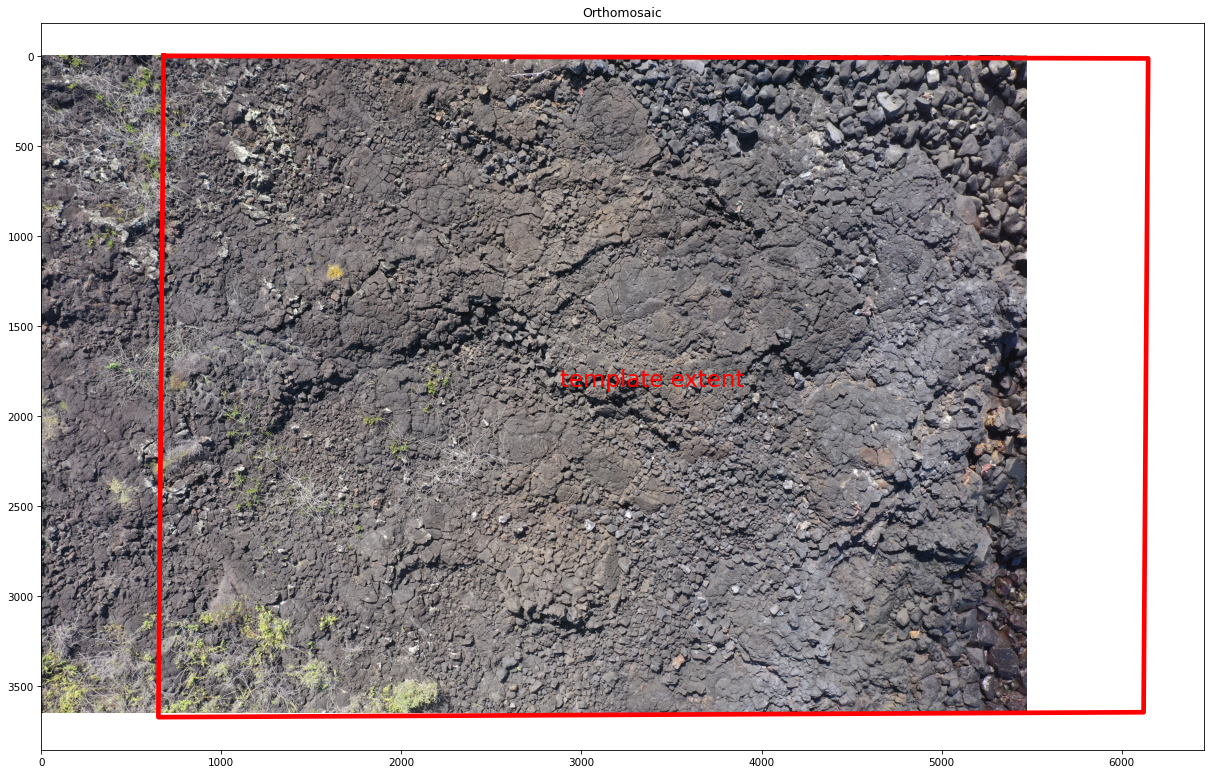

In [2]:



# tracking FMO04
drone_image = base_path / "single_images/DJI_0066.JPG"
image_2 = base_path / "single_images/DJI_0067.JPG"

images_path = base_path
output_path = base_path / "output"

hA = hA_from_file( file_path=annotations_file_path )
hA.images = [i for i in hA.images if i.image_name in [drone_image.name]]
assert len(hA.images) == 1, "There should be only a single image left"
drone_image_label = hA.images[0]


projected_labels = single_stage_template_matching_projection(template_image_path=drone_image,
                                                           large_image_path=image_2,
                                                           drone_image_labels=drone_image_label.labels)

In [3]:
projected_labels

[ImageLabel(id='2f6a1c24-c6e9-4bea-9641-2eda794d7bc1', class_name='iguana', bbox=[4429, 2466, 4530, 2570], polygon=None, mask=None, z_index=3, attributes={'ID': '8'}, keypoints=[]),
 ImageLabel(id='3f61f6ad-a11c-4c24-90ec-afbfa6d75b73', class_name='iguana', bbox=[5224, 2237, 5319, 2353], polygon=None, mask=None, z_index=4, attributes={'ID': '9'}, keypoints=[]),
 ImageLabel(id='65a143f5-049d-4a57-b9d7-72cf8cc40c44', class_name='iguana', bbox=[3819, 801, 3876, 951], polygon=None, mask=None, z_index=0, attributes={'ID': '7'}, keypoints=[]),
 ImageLabel(id='ec52344c-841f-41d0-8705-5775089fd448', class_name='iguana', bbox=[2968, 145, 3026, 319], polygon=None, mask=None, z_index=1, attributes={'ID': '1'}, keypoints=[]),
 ImageLabel(id='f3ac3a98-82b3-4d8e-aa80-78e152c05a44', class_name='iguana', bbox=[4885, 204, 4959, 264], polygon=None, mask=None, z_index=2, attributes={'ID': '11'}, keypoints=[])]

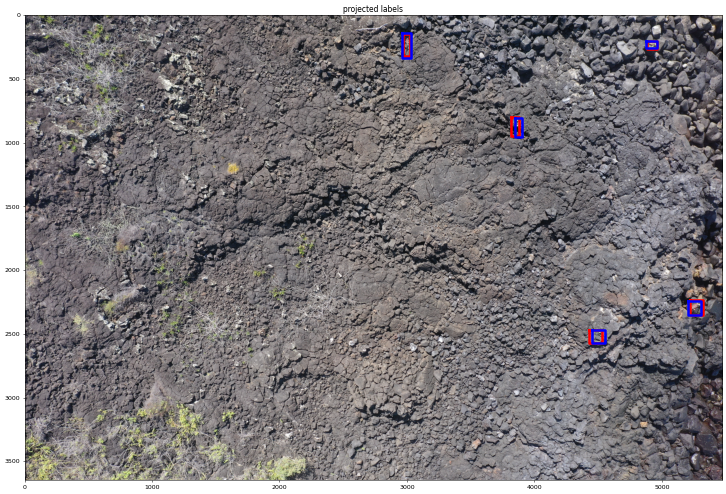

In [4]:
from matplotlib import pyplot as plt
from image_template_search.util.util import visualise_image, visualise_polygons

hA_gt = hA_from_file(file_path=annotations_file_path)
hA_gt.images = [i for i in hA_gt.images if i.image_name in [image_2.name]]
labels_gt = hA_gt.images[0].labels
assert len(hA_gt.images) == 1, "There should be only a single image left"
gt_image_label = hA_gt.images[0]

# debug_hasty_fiftyone(hA, images_path)
ax_p = visualise_image(image_path=image_2, show=False, title="projected labels", dpi=45)
ax_p = visualise_polygons(polygons=[x.bbox_polygon for x in projected_labels], ax=ax_p, linewidth=4, color="red", show=False)
ax_p = visualise_polygons(polygons=[x.bbox_polygon for x in labels_gt], ax=ax_p, linewidth=4, color="blue", show=False)

plt.show()

## Same workflow with a larger image

First the template needs to be found in the potentially arbitrary large image. This is done by tiling the large image and then searching for the template in each tile. The results are then projected back to the large image.

In [9]:
from image_template_search.image_similarity import find_patch_tiled

images_path = base_path
output_path = base_path / "output"




base_path = Path("/Users/christian/Library/CloudStorage/GoogleDrive-christian.winkelmann@gmail.com/My Drive/Datasets/IguanasFromAbove/Orthomosaics for quality analysis/")
drone_image = base_path / "San_STJB01_10012023/template_images/San_STJB01_10012023_DJI_0068/San_STJB01_10012023_DJI_0068.JPG"
image_2 =  base_path / "San_STJB01_10012023/San_STJB01_10012023_orthomosaic_DDeploy.tif" # DroneDeploy
# image_2 =  base_path / "San_STJB01_10012023/San_STJB01_10012023_orthomosaic_Pix4D.tiff" # pix4D
# image_2 =  base_path / "San_STJB01_10012023/San_STJB01_10012023_orthomosaic_Agisoft.tif" # metashape
interm_path = Path("/Users/christian/PycharmProjects/hnee/image_template_search/data")

annotations_file_path=base_path / "San_STJB01_10012023/template_images/methods_paper_labels.json"

tile_base_path = interm_path / "tiles"
cache_path = interm_path / "cache"
output_path = interm_path / "output"


hA = hA_from_file( file_path=annotations_file_path )
hA.images = [i for i in hA.images if i.image_name in [drone_image.name]]
assert len(hA.images) == 1, "There should be only a single image left"
drone_image_label = hA.images[0]

drone_image_label.image_name


'San_STJB01_10012023_DJI_0068.JPG'

In [ ]:
find_patch_tiled(template_path=drone_image, large_image_path=image_2,
                     output_path=output_path,
                     tile_size_x=5000,
                     tile_size_y=4000,
                     tile_base_path=tile_base_path,
                     cache_path=None,
                     MIN_MATCH_COUNT=50, visualise=True)

2024-11-12 17:15:14.569 | INFO     | image_template_search.image_rasterization:tile_large_image:143 - Tile saved to /Users/christian/PycharmProjects/hnee/image_template_search/data/tiles/tiles_tile_0_0.jpg
2024-11-12 17:15:39.851 | INFO     | image_template_search.image_rasterization:tile_large_image:143 - Tile saved to /Users/christian/PycharmProjects/hnee/image_template_search/data/tiles/tiles_tile_5000_0.jpg
2024-11-12 17:15:43.340 | INFO     | image_template_search.opencv_findobject_homography:_cached_matcher:309 - Computing matches for San_STJB01_10012023_DJI_0068.JPG and rotated_cropped_image_bbox_San_STJB01_10012023_orthomosaic_DDeploy.jpg


2024-11-12 17:05:27.048 | INFO     | image_template_search.image_similarity:get_similarity:340 - Using 2 x 2 tiles
2024-11-12 17:05:27.049 | INFO     | image_template_search.image_similarity:get_similarity:342 - START extracting features from San_STJB01_10012023_DJI_0068.JPG
2024-11-12 17:05:29.210 | INFO     | image_template_search.image_similarity:get_similarity:344 - DONE extracting features from San_STJB01_10012023_DJI_0068.JPG
2024-11-12 17:05:29.212 | INFO     | image_template_search.image_similarity:get_similarity:346 - START extracting features from rotated_cropped_image_bbox_San_STJB01_10012023_orthomosaic_DDeploy.jpg
2024-11-12 17:05:29.485 | INFO     | image_template_search.image_similarity:image_patcher:408 - Patch tile 0, 0
2024-11-12 17:05:30.012 | INFO     | image_template_search.image_similarity:image_patcher:408 - Patch tile 0, 1
2024-11-12 17:05:30.505 | INFO     | image_template_search.image_similarity:image_patcher:408 - Patch tile 1, 0
2024-11-12 17:05:31.008 | INF

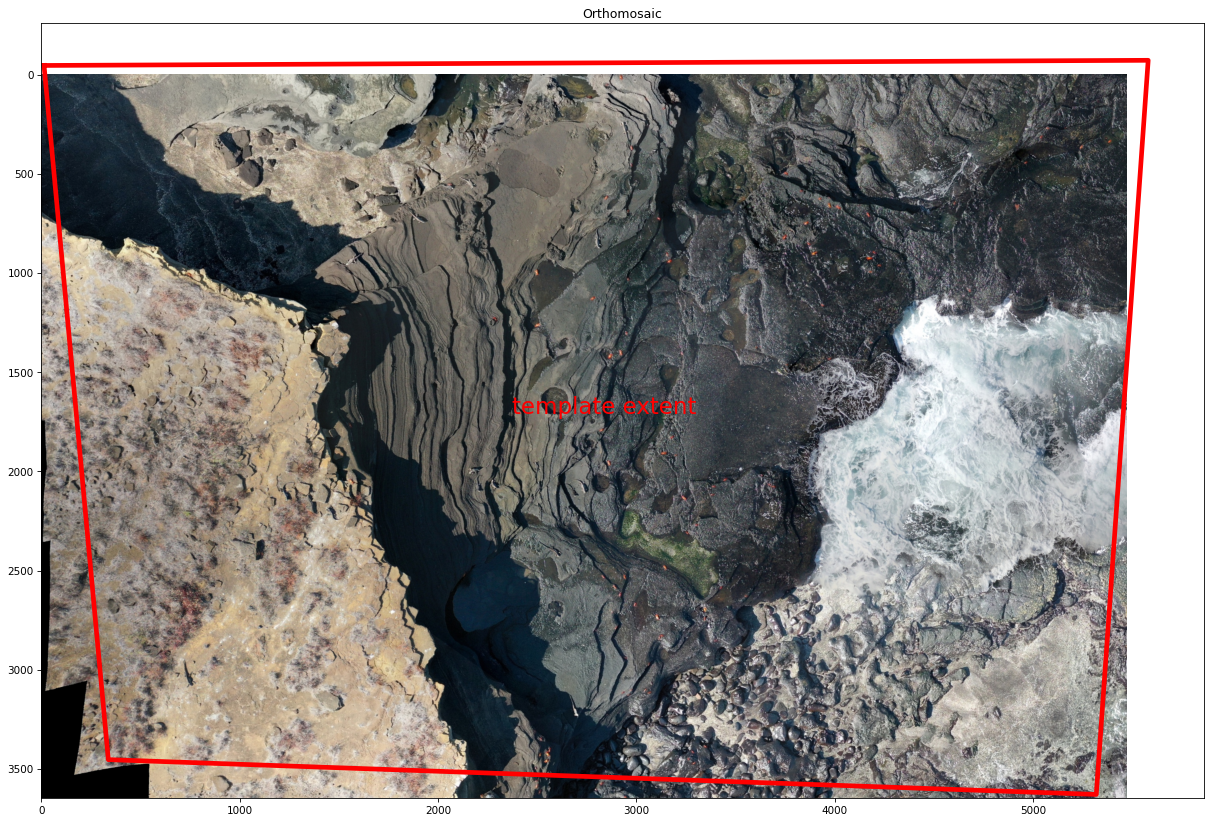

In [10]:
image_2 = Path("/data/output/San_STJB01_10012023_DJI_0068_DDeploy.jpg")

projected_labels = single_stage_template_matching_projection(template_image_path=drone_image,
                                                           large_image_path=image_2,
                                                           drone_image_labels=drone_image_label.labels)

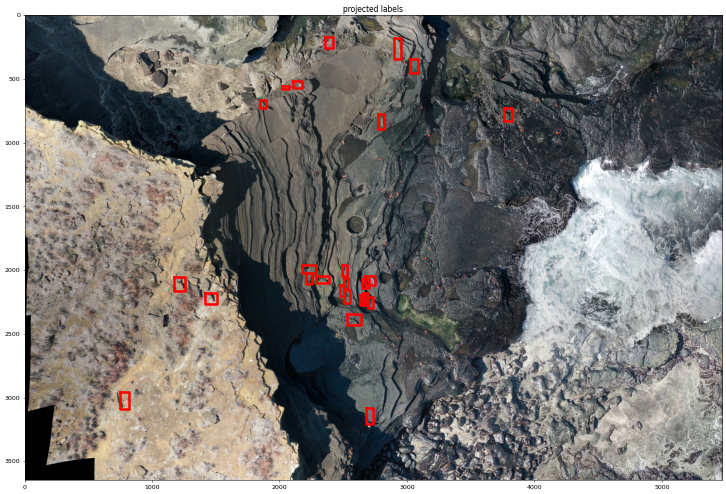

In [11]:
ax_p = visualise_image(image_path=image_2, show=False, title="projected labels", dpi=150)
ax_p = visualise_polygons(polygons=[x.bbox_polygon for x in projected_labels], ax=ax_p, linewidth=4, color="red", show=False)

plt.show()